In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [65]:
batch_size=32
image_size=256
channels=3

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'pepperplants',
    seed=123,
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size
)

Found 2475 files belonging to 2 classes.


In [9]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [11]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1]


In [13]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


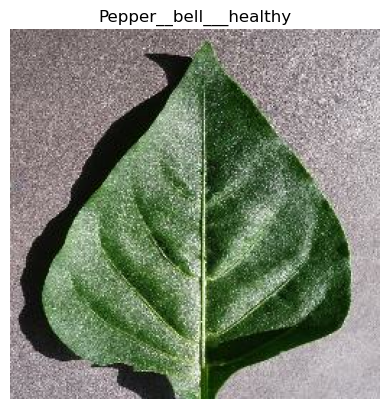

In [15]:
for image_batch,labels_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[0]])
    plt.axis('off')

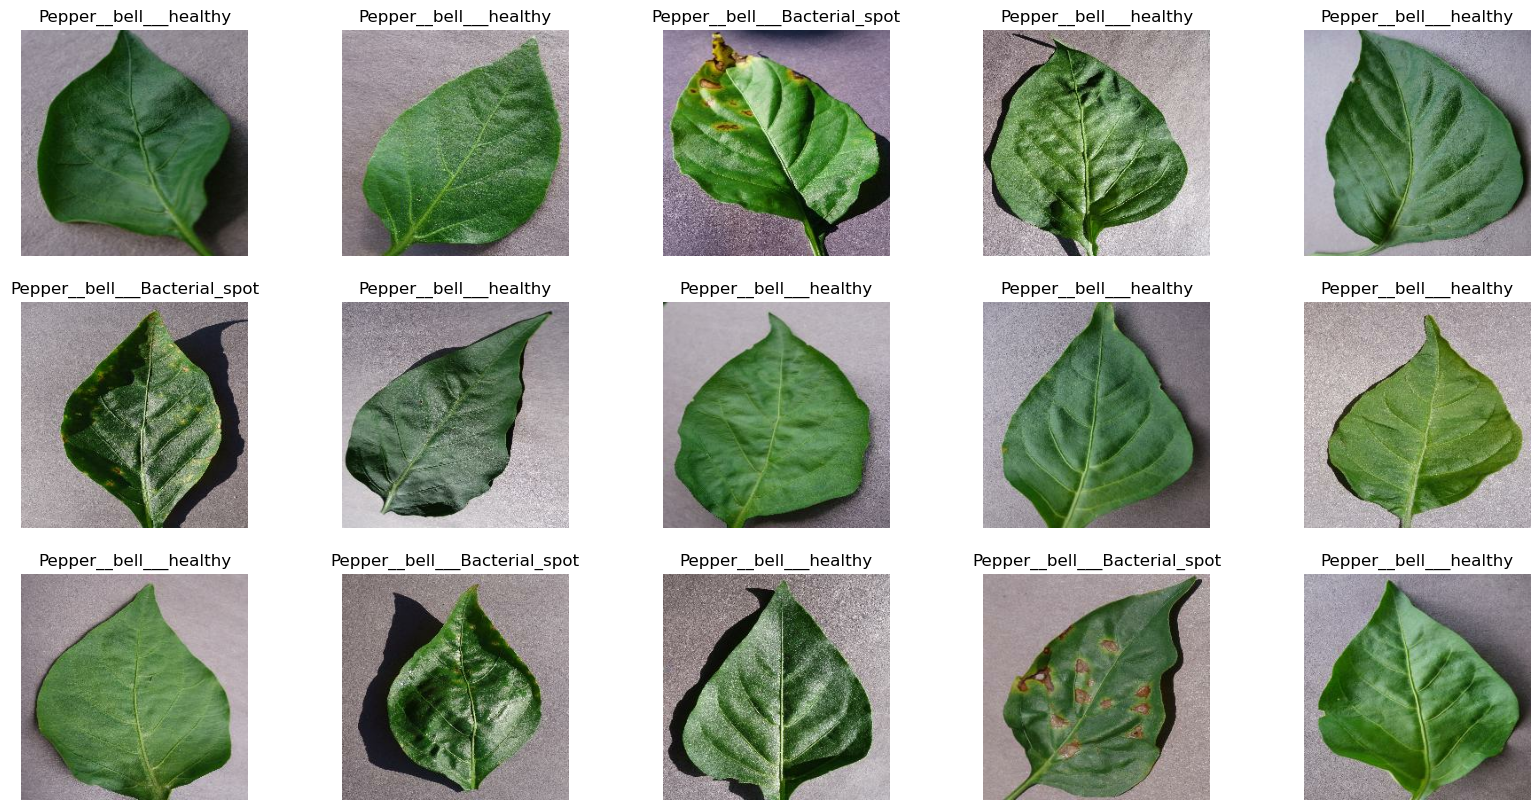

In [17]:
plt.figure(figsize=(20,10))
for image_batch,labels_batch in dataset.take(1):
    for i in range(15):
        ax = plt.subplot(3,5,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[labels_batch[i]])
        plt.axis('off')

In [49]:
train_ds = dataset.take(54)
test_ds = dataset.skip(54)
val_ds = test_ds.take(6)
test_ds = test_ds.skip(6)

In [51]:
def dataset_partitions(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size = len(ds)
    train_size = int(train_split*ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [53]:
train_ds,val_ds,test_ds = dataset_partitions(dataset)

In [55]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [57]:
resize_rescale = tf.keras.Sequential([
    layers.Resizing(image_size,image_size),
    layers.RandomRotation(0.2),
])

In [59]:
data_aug = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [61]:
train_ds = train_ds.map(lambda x,y:(data_aug(x,training = True),y)
                       ).prefetch(buffer_size=tf.data.AUTOTUNE)

In [67]:
input_shape = (batch_size,image_size,image_size,channels)
n_classes = 2
model = models.Sequential([
    resize_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax'),
])
model.build(input_shape=input_shape)

In [69]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 2)                     │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,682 (717.51 KB)

 Trainable params: 183,682 (717.51 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [73]:
history = model.fit(train_ds,batch_size=batch_size,
                    validation_data=val_ds,
                    verbose=1,
                    epochs=10)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.6598 - loss: 2.2853 - val_accuracy: 0.8973 - val_loss: 0.3289
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 303s 5s/step - accuracy: 0.8883 - loss: 0.3093 - val_accuracy: 0.9554 - val_loss: 0.1268
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.9395 - loss: 0.1975 - val_accuracy: 0.9688 - val_loss: 0.0932
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9811 - loss: 0.0714 - val_accuracy: 0.9866 - val_loss: 0.0493
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9840 - loss: 0.0693 - val_accuracy: 0.9955 - val_loss: 0.0284
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9753 - loss: 0.0636 - val_accuracy: 0.9866 - val_loss: 0.0510
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9855 - loss: 0.0595 - val_accuracy: 0.9911 - val_loss: 0.0232
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9909 - loss: 0.0312 - val_accuracy: 0.9821 - v

In [75]:
score = model.evaluate(test_ds)
score

9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 483ms/step - accuracy: 0.9908 - loss: 0.0167


[0.014472373761236668, 0.9925093650817871]

In [77]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
import numpy as np
plt.figure(figsize=(12, 12))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")